In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Import CSV file into Data Frame
popular_tweeters = pd.read_csv("../Resources/PopularAccounts.csv", dtype=str)

# Iterate through DataFrame
for index, row in popular_tweeters.iterrows():

    try:
        # Grab the username
        target_user = row["Screen Name"]
        # print(target_user)

        # Use the username with the Twitter API get_user
        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]

        # Get the specific column data
        user_tweets = user_account["statuses_count"]
        user_followers = user_account["followers_count"]
        user_following = user_account["friends_count"]
        user_favorites = user_account["favourites_count"]

        # Replace the row information for each
        popular_tweeters.at[index, "Real Name"] = user_real_name
        popular_tweeters.at[index, "Tweets"] = user_tweets
        popular_tweeters.at[index, "Followers"] = user_followers
        popular_tweeters.at[index, "Following"] = user_following
        popular_tweeters.at[index, "Favorites Count"] = user_favorites
        
    except tweepy.TweepError as e:
        print(f"exception for {row['Screen Name']}: {e}")
        popular_tweeters.drop(index=index,inplace=True)
    
# Export the new CSV
popular_tweeters.to_csv("PopularAcounts_New.csv", index=False)

# View the DataFrame
popular_tweeters.head()

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,9260,106962186,216,6037
1,justinbieber,Justin Bieber,30540,104425204,304700,3406
2,BarackObama,Barack Obama,15525,102280561,619094,11
3,Taylorswift13,Taylor Swift,100,83352958,0,464
4,rihanna,Rihanna,10178,87552498,1106,1004


In [4]:
# Calculate Averages
average_tweet_count = popular_tweeters["Tweets"].mean()
average_followers = popular_tweeters["Followers"].mean()
average_following_count = popular_tweeters["Following"].mean()
average_favorites_count = popular_tweeters["Favorites Count"].mean()

# Create DataFrame
averages = {"Average Tweet Count": average_tweet_count, 
            "Average Follower Count": average_followers, 
            "Average Following Count": average_following_count,
            "Average Favorites Count": average_favorites_count}

# Create a Dataframe of the averages
pd.DataFrame(averages, index=[0])

,Average Tweet Count,Average Follower Count,Average Following Count,Average Favorites Count
0,33250.3,49421354.64,31517.18,1920.58


In [5]:
# Extract Tweet Counts and Follower Counts
tweet_counts = popular_tweeters["Tweets"]
follow_count = popular_tweeters["Followers"]

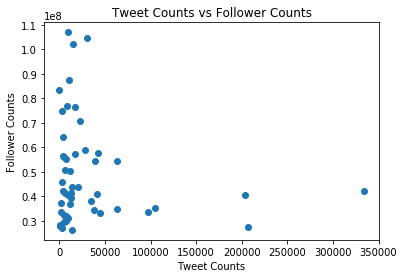

In [7]:
# Plot Tweet Counts vs Follower Counts
plt.scatter(tweet_counts, follow_count)
plt.xlabel("Tweet Counts")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Follower Counts")
plt.show()

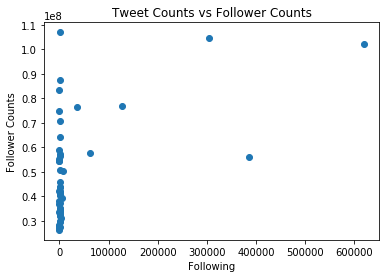

In [8]:
# Plot Number Following vs Following Counts
following_count = popular_tweeters["Following"]
plt.scatter(following_count, follow_count)
plt.xlabel("Following")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Follower Counts")
plt.show()

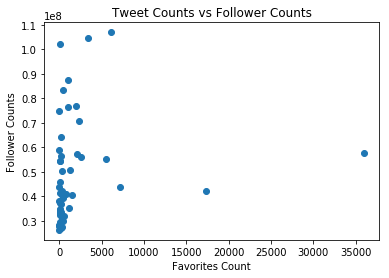

In [9]:
# Plot Number of Favorites vs Favorite Counts
favorites_count = popular_tweeters["Favorites Count"]
plt.scatter(favorites_count, follow_count)
plt.xlabel("Favorites Count")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Follower Counts")
plt.show()